## Recursive Piecewise Polynomial Filter with Sliding Least Square Technique   
This program uses the recursive algorithm (could be directly implemented in FPGA)

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

Initialize the variables:
 *** 
* constant offset is baseline
* amp is signal amplitude
* noise_amp is amplitude of electronic noise
* tau is decay constant of the exponential signal
* length is the length of the waveform
* rise_time is the time given to DTF to rise
* flat_top is the time given to DFT to remain flat at the top and at the bottom

In [2]:
baseline=0.
amp=25
noise_amp=0.
tau=500
length=7000
rise_time=400
flat_top=500

Lets define a exponential function

In [3]:
x=np.arange(-3500,3500,1)
def expo(amp, x, tau):
    y=[0]*len(x)#x*0
    for i in range (1, len(x)): 
        if (x[i] > 0):
            y[i] = amp * np.exp(-x[i]/tau)
        else:
            y[i] = 0
    return y

Lets make a numpy array for the noise and constant offset (named as baseline)

In [4]:
N=[0.]*7000
N=np.array(N)
for i in range (0,7000):
    N[i]=random.uniform(-1,1)
N=N*noise_amp
#now baseline offset
baseline_c=[baseline]*7000
baseline_c=np.array(baseline_c)
A = baseline_c+expo(amp, x, tau)
A=np.array(A)
#Hence the total signal
T=A+N

Plot of input signal with constant offset and noise

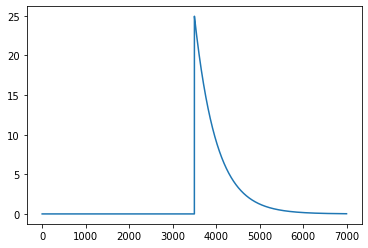

In [5]:
plt.plot(T)

Impulse response

In [6]:
sig=T
sig=np.array(sig)
r_0=[0]*7000
r_1=[0]*7000
r_2=[0]*7000
r_3=[0]*7000
for i in range (3500, 3601):
    if i>2:
        r_0[i]=T[i]
        r_1[i]=r_1[i-1]+T[i]
        r_2[i]=r_2[i-1]+r_1[i]
        r_3[i]=r_3[i-1]+r_2[i]

## Lanbda for the delayed substraction
$$\Lambda_m = \prod_{j=0}^{m-1} (L+j), m \geq 1 $$

$$\Lambda_1 =L$$
$$\Lambda_2 =\frac{1}{2}\times L \times(L+1)$$
$$\Lambda_3 =\frac{1}{6}\times L \times (L+1) \times (L+2)$$
$$\Lambda_4 =\frac{1}{24}\times L \times (L+1) \times (L+2) \times (L+3)$$
$$\Lambda_5 =\frac{1}{120}\times L \times (L+1) \times (L+2) \times (L+3)\times (L+4)$$
and so on

In [7]:
v_n=T
L=1000
delay=100
v_n=np.array(v_n)
r_0_L=[0]*7000
r_1_L=[0]*7000
r_2_L=[0]*7000
r_3_L=[0]*7000
r_t=[0]*7000
D_0_L=[0]*7000
D_1_L=[0]*7000
D_2_L=[0]*7000
D_3_L=[0]*7000
D_4_L=[0]*7000
D_5_L=[0]*7000
D_6_L=[0]*7000
D_7_L=[0]*7000

lam1=L #1
lam2=0.5*L*(L+1) #1/2*L
lam3=1/6*L*(L+1)*(L+2)
lam4=1/24*L*(L+1)*(L+2)*(L+3)
lam5=1/120*L*(L+1)*(L+2)*(L+3)*(L+4)
lam6=1/720*L*(L+1)*(L+2)*(L+3)*(L+4)*(L+5)
lam7=1/5040*L*(L+1)*(L+2)*(L+3)*(L+4)*(L+5)*(L+6)



for i in range (1, 7000):
    if i>100:
        #1st one
        D_0_L[i]=v_n[i]-v_n[i-L]
        D_0_L[i]=D_0_L[i]+D_0_L[i-1]
        
        #2nd one
        D_1_L[i]=D_0_L[i]-lam1*v_n[i-L]
        D_1_L[i]=D_1_L[i-1]+D_1_L[i]
        
        #3rd one
        D_2_L[i]=D_2_L[i-1]+D_1_L[i]-lam2*v_n[i-L]
        #4th one
        D_3_L[i]=D_3_L[i-1]+D_2_L[i]-lam3*v_n[i-L]
        #5th one
        D_4_L[i]=D_4_L[i-1]+D_3_L[i]-lam4*v_n[i-L]
        #6th one
        D_5_L[i]=D_5_L[i-1]+D_4_L[i]-lam5*v_n[i-L]
        #7th one
        D_6_L[i]=D_6_L[i-1]+D_5_L[i]-lam6*v_n[i-L]
        #8th one
        D_7_L[i]=D_7_L[i-1]+D_6_L[i]-lam7*v_n[i-L]
        

## Find inverse of the C-Matrix
These are stirling numbers of first kind

In [8]:
#C-matrix for the 8th coefficient is:
rp=np.array([[1,0,0,0,0,0,0,0,],[0,1,1/2,1/3,1/4,1/5,1/6,1/7], [0,0,1/2,1/2,11/24,5/12,137/360,7/20], [0,0,0,1/6,1/4,7/24,5/16,203/630], [0,0,0,0,1/24,1/12,17/144,7/48], [0,0,0,0,0,1/120,1/48,5/144], [0,0,0,0,0,0,1/720,1/240],[0,0,0,0,0,0,0,1/5040] ])

In [9]:
rp

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 5.00000000e-01, 3.33333333e-01,
        2.50000000e-01, 2.00000000e-01, 1.66666667e-01, 1.42857143e-01],
       [0.00000000e+00, 0.00000000e+00, 5.00000000e-01, 5.00000000e-01,
        4.58333333e-01, 4.16666667e-01, 3.80555556e-01, 3.50000000e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.66666667e-01,
        2.50000000e-01, 2.91666667e-01, 3.12500000e-01, 3.22222222e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.16666667e-02, 8.33333333e-02, 1.18055556e-01, 1.45833333e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.33333333e-03, 2.08333333e-02, 3.47222222e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.38888889e-03, 4.

In [10]:
rp_inv=(np.linalg.inv(rp))
print(rp_inv)

[[ 1.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00]
 [ 0.000e+00  1.000e+00 -1.000e+00  1.000e+00 -1.000e+00  1.000e+00
  -1.000e+00  1.000e+00]
 [ 0.000e+00  0.000e+00  2.000e+00 -6.000e+00  1.400e+01 -3.000e+01
   6.200e+01 -1.260e+02]
 [ 0.000e+00  0.000e+00  0.000e+00  6.000e+00 -3.600e+01  1.500e+02
  -5.400e+02  1.806e+03]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  2.400e+01 -2.400e+02
   1.560e+03 -8.400e+03]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  1.200e+02
  -1.800e+03  1.680e+04]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   7.200e+02 -1.512e+04]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  5.040e+03]]


In [11]:
#from fit program
baseline_c=np.array([-8.664253789567694e-26, -9.343392405081817e-26, 2.9578156915996253e-20, 2.8276093733672987e-16, 9.916656769765617e-13, 1.5471336815513415e-09, 1.0202481412546802e-06, 0.00020613125325316412])
rising_c=np.array([-5.3933994143884334e-05, -1.9959061812180323e-06, 0.0032492739362401934, 4.6826976288549815e-05, -0.07651691043461728, -0.0002558665206315869, 1.216465814414714, 2.5001875870645955])

decay_c=np.array([-8.962511684869458e-23, 1.1340026558787559e-22, -6.310039457017033e-17, 7.236264783938056e-13, -3.3011330024939866e-09, 7.6406796035518e-06, -0.009280117429225115, 4.944042752009567])

print(baseline_c)
print(rising_c)
print(decay_c)

[-8.66425379e-26 -9.34339241e-26  2.95781569e-20  2.82760937e-16
  9.91665677e-13  1.54713368e-09  1.02024814e-06  2.06131253e-04]
[-5.39339941e-05 -1.99590618e-06  3.24927394e-03  4.68269763e-05
 -7.65169104e-02 -2.55866521e-04  1.21646581e+00  2.50018759e+00]
[-8.96251168e-23  1.13400266e-22 -6.31003946e-17  7.23626478e-13
 -3.30113300e-09  7.64067960e-06 -9.28011743e-03  4.94404275e+00]


In [12]:
baseline_cp=np.matmul(rp_inv,baseline_c)
rising_cp=np.matmul(rp_inv,rising_c)
decay_cp=np.matmul(rp_inv,decay_c)
print(baseline_cp)
print(rising_cp)
print(decay_cp)

[-8.66425379e-26  2.05112551e-04 -2.59093289e-02  3.71722341e-01
 -1.72991131e+00  3.46116879e+00 -3.11596997e+00  1.03890152e+00]
[-5.39339941e-05  1.35677837e+00 -2.40660099e+02  3.86116375e+03
 -1.91056641e+04  3.98134823e+04 -3.69269809e+04  1.26009454e+04]
[-8.96251168e-23  4.95333051e+00 -6.23524983e+02  8.93395362e+03
 -4.15444379e+04  8.30766234e+04 -7.47606081e+04  2.49179755e+04]


In [13]:
D_baseline=[0]*7000
for i in range (1, 7000):
    if i>100:
        D_baseline[i]=D_baseline[i-1] + baseline_cp[0] * D_0_L[i] + baseline_cp[1] * D_1_L[i] + baseline_cp[2] * D_2_L[i]+baseline_cp[3] * D_3_L[i] + baseline_cp[4] * D_4_L[i] + baseline_cp[5] * D_5_L[i]+baseline_cp[6] * D_6_L[i] + baseline_cp[7] * D_7_L[i]

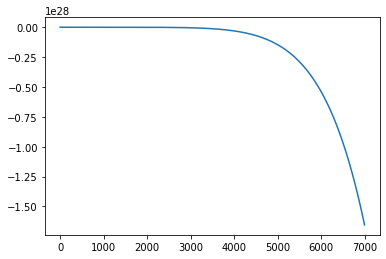

In [20]:
plt.plot(D_baseline)
#plt.xlim(0,4000)
#plt.relim()
#plt.plot(D_7_L, color='r')
#D_baseline[999]

In [15]:
D_baseline[3400]

-1.0213191682840328e+26

In [16]:
D_rising=[0]*7000
for i in range (1, 7000):
    if i>100:
        D_rising[i]=D_rising[i-1] + rising_cp[0] * D_0_L[i] +rising_cp[1] * D_1_L[i] +rising_cp[2] * D_2_L[i]+rising_cp[3] * D_3_L[i] + rising_cp[4] * D_4_L[i] + rising_cp[5] * D_5_L[i]+rising_cp[6] * D_6_L[i] + rising_cp[7] * D_7_L[i]

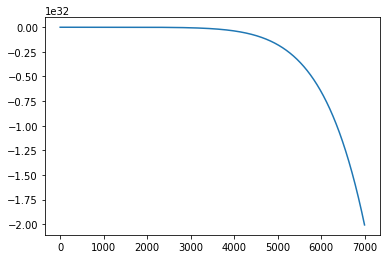

In [17]:
plt.plot(D_rising)

In [18]:
D_decay=[0]*7000
for i in range (1, 7000):
    if i>100:
        D_decay[i]=D_decay[i-1] + decay_cp[0] * D_0_L[i] +decay_cp[1] * D_1_L[i] +decay_cp[2] * D_2_L[i]+decay_cp[3] * D_3_L[i] + decay_cp[4] * D_4_L[i] + decay_cp[5] * D_5_L[i]+decay_cp[6] * D_6_L[i] + decay_cp[7] * D_7_L[i]

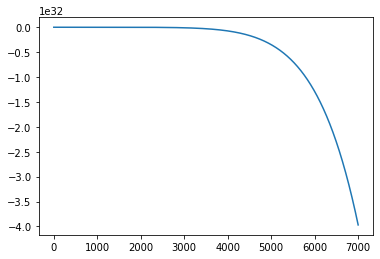

In [19]:
plt.plot(D_decay)